<a href="https://colab.research.google.com/github/jeffersonramelo/Paper-pos-doc/blob/main/modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

# Caminho para o arquivo XLSX
caminho_arquivo = '/content/teste.xlsx'

# Lê o arquivo XLSX
dados = pd.read_excel(caminho_arquivo)

# Agora, 'dados' contém os dados do arquivo XLSX


In [20]:
# Mostrar o conjunto de variáveis (nomes das colunas)
variaveis = dados.columns
print(variaveis)


Index(['ID', 'VM30Abr11', 'PL Dez 2010', 'LLDez 2010'], dtype='object')


In [26]:
# Exibe as primeiras linhas do DataFrame
print(dados.head())


    ID     VM30Abr11  PL Dez 2010  LLDez 2010
0  389  7.775810e+04       1414.0      -731.0
1  152  1.201111e+04       1971.0     -4642.0
2  126  6.735817e+04       5871.0      -508.0
3  133  1.761227e+05      17579.0     -3281.0
4   43  1.368326e+06      19150.0   -133617.0


In [37]:
import statsmodels.api as sm

# Supondo que 'dados' seja o DataFrame com suas variáveis

# Defina as variáveis independentes e dependente
X = dados[['PL Dez 2010', 'LLDez 2010']]
y = dados['VM30Abr11']

# Adicione uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Crie o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Visualize os resultados do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:              VM30Abr11   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2500.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.27e-148
Time:                        01:03:02   Log-Likelihood:                -3711.2
No. Observations:                 216   AIC:                             7428.
Df Residuals:                     213   BIC:                             7439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.755e+06   4.94e+05      3.554      

Em relação aos resultados apresentados no seu modelo de regressão:

O valor do teste de Durbin-Watson é 1.676, o que sugere uma leve autocorrelação positiva nos resíduos, mas não muito forte.
O valor-p associado ao teste de Jarque-Bera é praticamente zero (0.00), o que indica que os resíduos não seguem uma distribuição normal.

Interpretação DW:

Valor DW ≈ 2: Ausência de autocorrelação significativa nos resíduos (boa notícia).
Valor DW < 2: Autocorrelação positiva nos resíduos (erros adjacentes são correlacionados positivamente).
Valor DW > 2: Autocorrelação negativa nos resíduos (erros adjacentes são correlacionados negativamente).

teste de heterocedasticidade de White

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Calcule os resíduos do modelo
residuos = modelo.resid

# Realize o teste de White para heterocedasticidade
teste_white = het_white(residuos, X)

# Imprima os resultados do teste
print("Estatística do teste de White:", teste_white[0])
print("Valor-p do teste de White:", teste_white[1])

Estatística do teste de White: 89.40199950574363
Valor-p do teste de White: 1.7641201986939033e-18


Se o valor-p for menor que um nível de significância escolhido (por exemplo, 0,05), você pode rejeitar a hipótese nula de homocedasticidade

Gráfico dos resíduos. Se o gráfico de dispersão mostrar um padrão claro de aumento ou diminuição na variabilidade dos resíduos, isso pode sugerir a presença de heterocedasticidade.

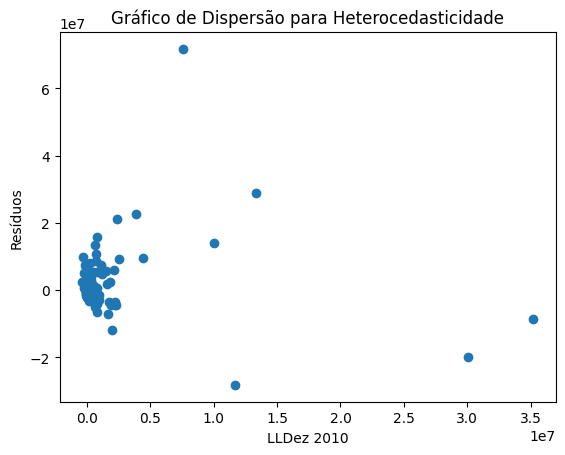

In [30]:
import matplotlib.pyplot as plt

# Crie um gráfico de dispersão dos resíduos em relação a uma variável (por exemplo, 'PL Dez 2010')
plt.scatter(dados['LLDez 2010'], residuos)
plt.xlabel('LLDez 2010')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão para Heterocedasticidade')
plt.show()


transformar variáveis de modo a resolver os problemas de heterocedasticidade. Nesse caso utilizando a normalização

In [33]:
from sklearn.preprocessing import StandardScaler

# Suponha que 'X' seja o seu conjunto de variáveis independentes
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)


In [34]:
import statsmodels.api as sm

# Supondo que 'dados' seja o DataFrame com suas variáveis

# Defina as variáveis independentes e dependente
X = X_padronizado
y = dados['VM30Abr11']

# Adicione uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Crie o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Visualize os resultados do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:              VM30Abr11   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2500.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.27e-148
Time:                        00:57:23   Log-Likelihood:                -3711.2
No. Observations:                 216   AIC:                             7428.
Df Residuals:                     213   BIC:                             7439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.86e+06    4.8e+05     20.532      0.0

In [35]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Calcule os resíduos do modelo
residuos = modelo.resid

# Realize o teste de White para heterocedasticidade
teste_white = het_white(residuos, X)

# Imprima os resultados do teste
print("Estatística do teste de White:", teste_white[0])
print("Valor-p do teste de White:", teste_white[1])

Estatística do teste de White: 89.4137872816294
Valor-p do teste de White: 8.921883536168704e-18


verificar outliers

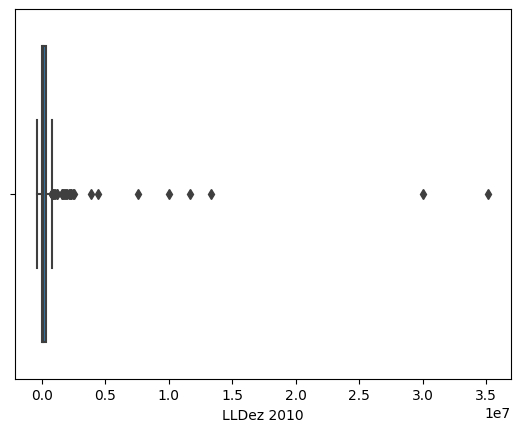

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que 'dados' seja o seu DataFrame e 'PL Dez 2010' seja a coluna que você deseja visualizar
X = dados['LLDez 2010']
sns.boxplot(x=X)
plt.show()


In [48]:
from scipy import stats

# Suponha que 'dados' seja uma matriz ou lista de valores
outliers = stats.zscore(dados) > 3
outliers


,ID,VM30Abr11,PL Dez 2010,LLDez 2010
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
211,False,True,False,True
212,False,False,False,False
213,False,False,False,False
214,False,True,True,True


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(outliers, *['VM30Abr11'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(outliers, *['PL Dez 2010'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(outliers, *['LLDez 2010'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(outliers, *['VM30Abr11', 'PL Dez 2010'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(outliers, *['PL Dez 2010', 'LLDez 2010'], **{})
chart

tratar outliers: A winsorização ao nível de 1% envolve substituir os 1% dos valores mais extremos por valores no limite do intervalo aceitável, ou seja, os 1% menores e os 1% maiores dos valores.

In [50]:
from scipy.stats.mstats import winsorize

nivel_winsorizacao = 0.01  # 1% de winsorização

# Aplica a winsorização às variáveis independentes
dados['PL Dez 2010_winsorizada'] = winsorize(dados['PL Dez 2010'], limits=[nivel_winsorizacao, nivel_winsorizacao])
dados['LLDez 2010_winsorizada'] = winsorize(dados['LLDez 2010'], limits=[nivel_winsorizacao, nivel_winsorizacao])

# Variáveis winsorizadas agora contêm os valores winsorizados


In [51]:
import statsmodels.api as sm

# Supondo que 'dados' seja o DataFrame com suas variáveis

# Defina as variáveis independentes e dependente
X = dados[['PL Dez 2010_winsorizada', 'LLDez 2010_winsorizada']]
y = dados['VM30Abr11']

# Adicione uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Crie o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Visualize os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              VM30Abr11   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     528.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.64e-83
Time:                        01:17:27   Log-Likelihood:                -3863.7
No. Observations:                 216   AIC:                             7733.
Df Residuals:                     213   BIC:                             7744.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7

winsorização e normalização juntos

In [52]:
from sklearn.preprocessing import StandardScaler

# Suponha que 'X' seja o seu conjunto de variáveis independentes
scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

In [53]:
import statsmodels.api as sm

# Supondo que 'dados' seja o DataFrame com suas variáveis

# Defina as variáveis independentes e dependente
X = X_padronizado
y = dados['VM30Abr11']

# Adicione uma constante ao conjunto de variáveis independentes
X = sm.add_constant(X)

# Crie o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Visualize os resultados do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              VM30Abr11   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     528.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.64e-83
Time:                        01:21:06   Log-Likelihood:                -3863.7
No. Observations:                 216   AIC:                             7733.
Df Residuals:                     213   BIC:                             7744.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.86e+06   9.73e+05     10.134      0.0